In [22]:
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from autoviz.AutoViz_Class import AutoViz_Class

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


To understand the Olist dataset, we will focus on the data that are at the core of any e-commerce organisation business model. We will focus on orders, product purchased, customers and their reviews.<br>
    - The order gives us information about who buys what and when.<br>
    - The product purchased tells us what drives the revenue, it allows us to see bestselling products, poor working product, allows category level analysis and can be connected to review, returns etc.<br>
    - The customers data allows segmentation and retention analysis<br>
    - The reviews allows us to perform sentiment analysis, show satisfaction and dissatisfaction.<br>
    <br>
The **Seller** workflow ⚙

The seller:

1. joins Olist
2. uploads their product catalogues
    - (Olist) displays these catalogues to existing marketplaces (Amazon, Bahia, Walmart, ...)
3. gets notified whenever a product is sold
4. hands over the ordered items to third-party logistic carriers

*Note: Multiple sellers can be involved in one customer's order!*

The **Customer** workflow ⚙

The customer:

1. browses products on marketplaces (Amazon, Bahia, Walmart, ...)
2. purchases products listed via store
3. gets an expected date for delivery
    - *ETA = Estimated Time of Arrival (of the orders)*
4. receives the order(s)
5. leaves a review

*Note: Between 2016 and mid-2018, a review could be left as soon as the order was sent, meaning that a customer could potentially leave a review for a product they hadn't received yet!*
It is showing the whole customer journey, from browsing to placing an order, receiving the product(s) he purchased to leaving a review. 

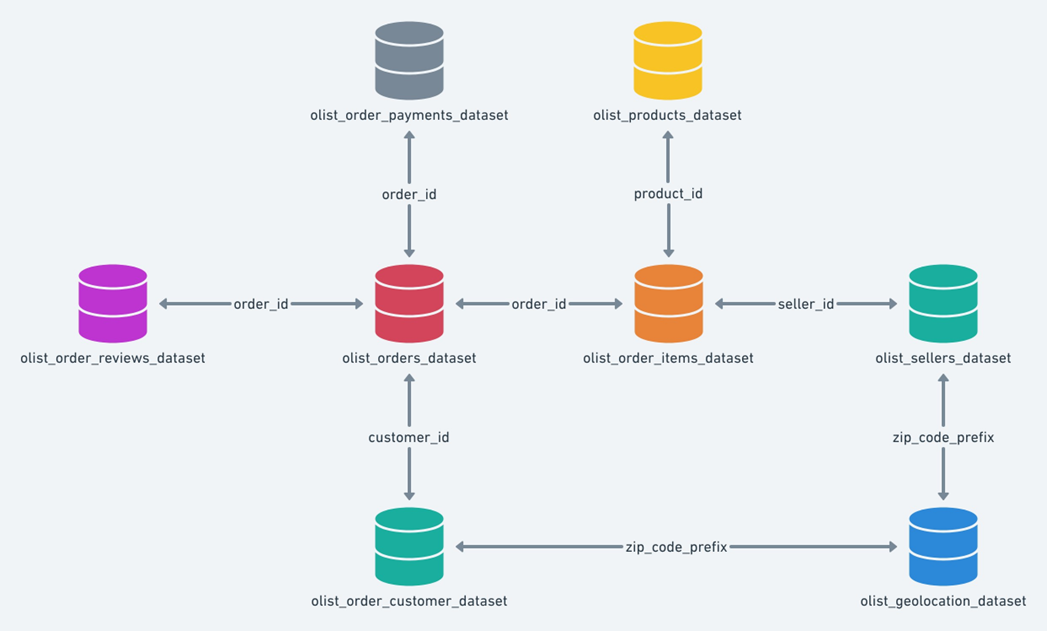

In [2]:
Image("Image/olist_erd.png")

In [3]:
# Load CSVs
orders = pd.read_csv("data/olist_orders_dataset.csv")
order_items = pd.read_csv("data/olist_order_items_dataset.csv")
order_payments = pd.read_csv("data/olist_order_payments_dataset.csv")
order_reviews = pd.read_csv("data/olist_order_reviews_dataset.csv")
customers = pd.read_csv("data/olist_customers_dataset.csv")
products = pd.read_csv("data/olist_products_dataset.csv")
sellers = pd.read_csv("data/olist_sellers_dataset.csv")
categories = pd.read_csv("data/product_category_name_translation.csv")

In [4]:
# Merge datasets (on 'order_id' or other keys)
df = orders.merge(order_items, on='order_id', how='left') \
           .merge(order_payments, on='order_id', how='left') \
           .merge(order_reviews, on='order_id', how='left') \
           .merge(customers, on='customer_id', how='left') \
           .merge(products, on='product_id', how='left') \
           .merge(sellers, on='seller_id', how='left') \
           .merge(categories, on='product_category_name', how='left')
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,auto


### Basic EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   order_item_id                  118310 non-null  float64
 9   product_id                     118310 non-null  object 
 10  seller_id                      118310 non-null  object 
 11  shipping_limit_date            118310 non-null  object 
 12  price                         

In [6]:
df.describe()

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix
count,118310.000000,118310.000000,118310.000000,119140.000000,119140.000000,119140.000000,118146.000000,119143.000000,116601.000000,116601.000000,116601.000000,118290.000000,118290.000000,118290.000000,118290.000000,118310.000000
mean,1.196543,120.646603,20.032387,1.094737,2.941246,172.735135,4.015582,35033.451298,48.767498,785.967822,2.205161,2112.250740,30.265145,16.619706,23.074799,24442.410413
std,0.699489,184.109691,15.836850,0.730141,2.777848,267.776077,1.400436,29823.198969,10.033540,652.584121,1.717452,3786.695111,16.189367,13.453584,11.749139,27573.004511
min,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,1.000000,1003.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000
25%,1.000000,39.900000,13.080000,1.000000,1.000000,60.850000,4.000000,11250.000000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000
50%,1.000000,74.900000,16.280000,1.000000,2.000000,108.160000,5.000000,24240.000000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000
75%,1.000000,134.900000,21.180000,1.000000,4.000000,189.240000,5.000000,58475.000000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,27972.000000
max,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000,5.000000,99990.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000


In [7]:
df.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
order_item_id                       21
product_id                       32951
seller_id                         3095
shipping_limit_date              93318
price                             5968
freight_value                     6999
payment_sequential                  29
payment_type                         5
payment_installments                24
payment_value                    29077
review_id                        98410
review_score                         5
review_comment_title              4527
review_comment_message           36159
review_creation_date               636
review_answer_timestamp          98248
customer_unique_id               96096
customer_zip_code_prefix 

In [8]:
df.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
order_item_id                       833
product_id                          833
seller_id                           833
shipping_limit_date                 833
price                               833
freight_value                       833
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
review_id                           997
review_score                        997
review_comment_title             105154
review_comment_message            68898
review_creation_date                997
review_answer_timestamp             997
customer_unique_id                    0


In [9]:
df = df.drop(columns = ["review_comment_title"]) # It is an empty column.

In [16]:
profile = sv.analyze(df)
profile

                                             |                                                  | [  0%]   00:…

In [20]:
profile.show_html("profile.html")

Report profile.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [24]:
AV = AutoViz_Class()

In [ ]:
report = AV.AutoViz(df)

Shape of your Data Set loaded: (119143, 39)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  15
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  16
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  3
    Number of NLP String Columns =  4
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    39 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
15 numeric variables in data exceeds limit, taking top 30 variables
    List of variables

AttributeError: 'ColormapRegistry' object has no attribute 'get_cmap'

Number of All Scatter Plots = 120
Could not draw Distribution Plots 'DataFrame' object has no attribute 'iteritems'
